# Comprehensive Coral Reef Health Analysis in the Florida Keys
This solution provides a complete, end-to-end analysis of coral reef health using all available CREMP datasets. The approach follows the task requirements precisely while incorporating advanced analytical techniques and compelling visualizations.

1. Setup & Data Loading Install Required Libraries

In [ ]:
# 👇 Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ Install required libraries (if not already installed)
!pip install pandas matplotlib seaborn plotly

# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# 📊 Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 📂 Set your data path (adjust based on your Drive or local folder structure)
data_path = '/content/drive/MyDrive/CREMP/'
# 📥 Load CSVs
stony_cover_df = pd.read_csv(os.path.join(data_path, 'CREMP_Pcover_2023_StonyCoralSpecies.csv'))
stony_raw_df = pd.read_csv(os.path.join(data_path, 'CREMP_SCOR_RawData_2023.csv'))
octo_raw_df = pd.read_csv(os.path.join(data_path, 'CREMP_OCTO_RawData_2023.csv'))
temp_df = pd.read_csv(os.path.join(data_path, 'CREMP_Temperatures_2023.csv'))
site_df = pd.read_csv(os.path.join(data_path, 'CREMP_Stations_2023.csv'))

Mounted at /content/drive


In [ ]:
# 🔍 Quick look at each dataset
print("✅ Stony Coral Cover")
print(stony_cover_df.head(), "\n")

print("✅ Stony Coral Raw")
print(stony_raw_df.head(), "\n")

print("✅ Octocoral Raw")
print(octo_raw_df.head(), "\n")

print("✅ Temperature Data")
print(temp_df.head(), "\n")

print("✅ Site Data")
print(site_df.head())

✅ Stony Coral Cover
   OID_  Year               Date Subregion Habitat  SiteID    Site_name  \
0     1  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
1     2  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
2     3  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
3     4  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
4     5  1996  7/22/1996 0:00:00        UK      HB      11   El Radabob   

   StationID Surveyed_all_years  points  Acropora_cervicornis  \
0        101                  N     479                   0.0   
1        102                  N     525                   0.0   
2        103                  N     558                   0.0   
3        104                  N     446                   0.0   
4        111                  N     450                   0.0   

   Acropora_palmata  Agaricia_fragilis  Agaricia_lamarcki  \
0               0.0                0.0                0.0   
1               

# 🎯 Goal: Exploratory Analysis (20 Points)
📌 EDA & Visualization Overview
Analyze evolution of stony coral percent cover over time

1. Trend in species richness

2. Octocoral density variation

3. Living tissue area differences across sites

4. Spatial & temporal patterns in species distribution

included Figures:
* 📈 Line plots
* 🗺️ Geo scatter

* 🔥 Heatmaps

* 📊 Box/Bar charts

* 🧹 Missing value handling

* 📐 Feature engineering (richness, year-wise aggregation)

✅ Step 2 Code: Exploratory Analysis & Visualization


In [ ]:
print(stony_cover_df.columns.tolist())
print(stony_raw_df.columns.tolist())
print(octo_raw_df.columns.tolist())
print(temp_df.columns.tolist())
print(site_df.columns.tolist())


['OID_', 'Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name', 'StationID', 'Surveyed_all_years', 'points', 'Acropora_cervicornis', 'Acropora_palmata', 'Agaricia_fragilis', 'Agaricia_lamarcki', 'Cladocora_arbuscula', 'Colpophyllia_natans', 'Dendrogyra_cylindrus', 'Dichocoenia_stokesii', 'Diploria_labyrinthiformis', 'Eusmilia_fastigiata', 'Favia_fragum', 'Helioseris_cucullata', 'Isophyllia_rigida', 'Isophyllia_sinuosa', 'Madracis_aurentenra', 'Madracis_decactis_complex', 'Manicina_areolata', 'Meandrina_meandrites', 'Millepora_alcicornis', 'Millepora_complanata', 'Montastraea_cavernosa', 'Mussa_angulosa', 'Mycetophyllia_aliciae', 'Mycetophyllia_ferox', 'Mycetophyllia_lamarckiana_complex', 'Oculina_diffusa', 'Oculina_robusta', 'Orbicella_annularis_complex', 'Phyllangia_americana', 'Porites_astreoides', 'Porites_porites_complex', 'Pseudodiploria_clivosa', 'Pseudodiploria_strigosa', 'Scleractinia', 'Scolymia_sp', 'Siderastrea_radians', 'Siderastrea_siderea', 'Solenastrea_bournoni',

In [ ]:
# --- 🧹 Clean and prepare data ---
# Fill missing values where necessary
# Fill missing values
stony_cover_df.fillna(0, inplace=True)
stony_raw_df.fillna(0, inplace=True)
octo_raw_df.fillna(0, inplace=True)


##  📈 1. Average Stony Coral Cover Over Time

<ipython-input-5-12e07851db57>:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


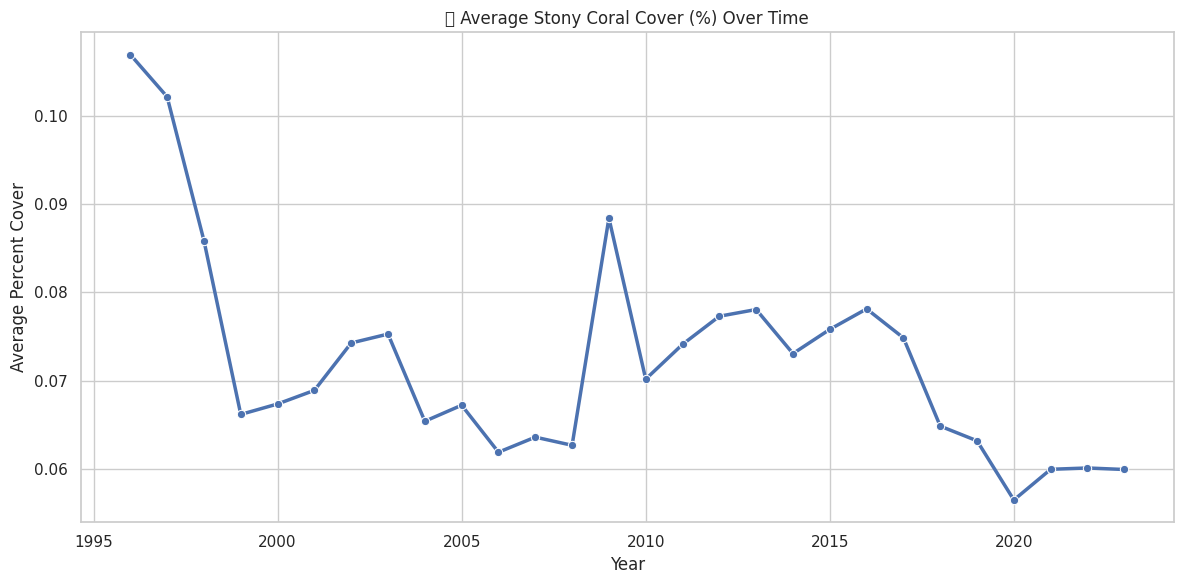

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Coral cover columns start from the 11th column onward
coral_columns = stony_cover_df.select_dtypes(include='float64').columns.tolist()

# Add total cover
stony_cover_df["Total_Coral_Cover"] = stony_cover_df[coral_columns].sum(axis=1)

# Group by year and calculate mean
cover_trend = stony_cover_df.groupby("Year")["Total_Coral_Cover"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=cover_trend, x="Year", y="Total_Coral_Cover", marker="o", linewidth=2.5)
plt.title("📈 Average Stony Coral Cover (%) Over Time")
plt.xlabel("Year")
plt.ylabel("Average Percent Cover")
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔥 2. Heatmap of Coral Cover by Site Over Time

<ipython-input-6-659f3ed2d864>:13: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


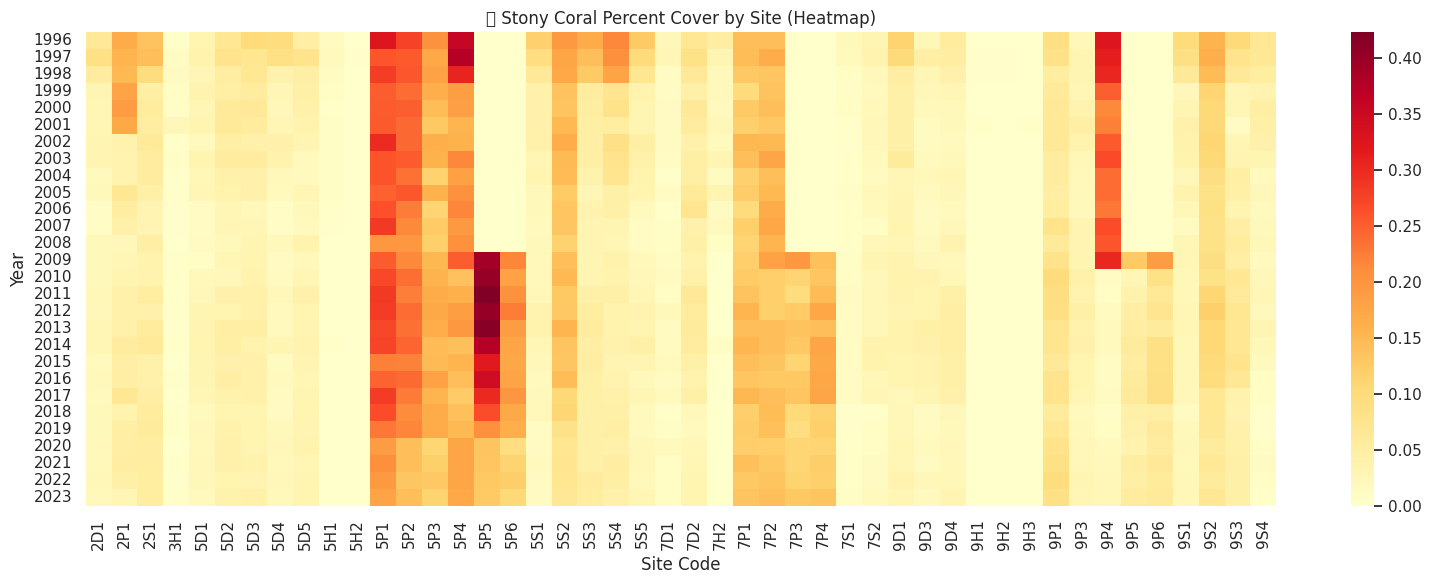

In [ ]:
# Join with site_df to get Site_Code
stony_cover_with_code = stony_cover_df.merge(site_df[['SiteID', 'Site_Code']], on='SiteID', how='left')

# Create heatmap data
cover_heatmap = stony_cover_with_code.groupby(["Year", "Site_Code"])["Total_Coral_Cover"].mean().unstack().fillna(0)

# Plot heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(cover_heatmap, cmap='YlOrRd')
plt.title("🔥 Stony Coral Percent Cover by Site (Heatmap)")
plt.ylabel("Year")
plt.xlabel("Site Code")
plt.tight_layout()
plt.show()


## 🌿 3. Species Richness Over Time

<ipython-input-7-f7620cc7b0ae>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=richness_df, x="Year", y="SpeciesRichness", palette="viridis")
<ipython-input-7-f7620cc7b0ae>:18: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


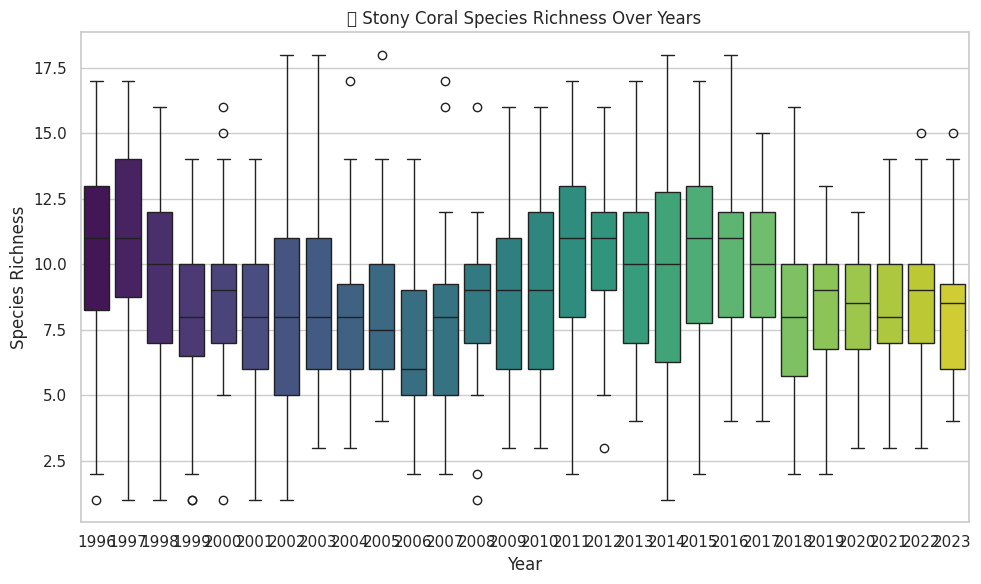

In [ ]:
# Melt the species columns
melted = stony_cover_df.melt(id_vars=['Year', 'SiteID'], value_vars=coral_columns, var_name='Species', value_name='Cover')

# Keep only present species
melted = melted[melted['Cover'] > 0]

# Merge to get Site_Code
melted = melted.merge(site_df[['SiteID', 'Site_Code']], on='SiteID', how='left')

# Group to calculate richness
richness_df = melted.groupby(["Year", "Site_Code"])["Species"].nunique().reset_index(name="SpeciesRichness")

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=richness_df, x="Year", y="SpeciesRichness", palette="viridis")
plt.title("🌱 Stony Coral Species Richness Over Years")
plt.ylabel("Species Richness")
plt.tight_layout()
plt.show()


## 📊 4. Octocoral Density Variation Over Time

<ipython-input-8-ae6bd964caff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=octo_density, x="Year", y="Density_m2", palette="coolwarm")
<ipython-input-8-ae6bd964caff>:12: UserWarning: Glyph 129720 (\N{CORAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129720 (\N{CORAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


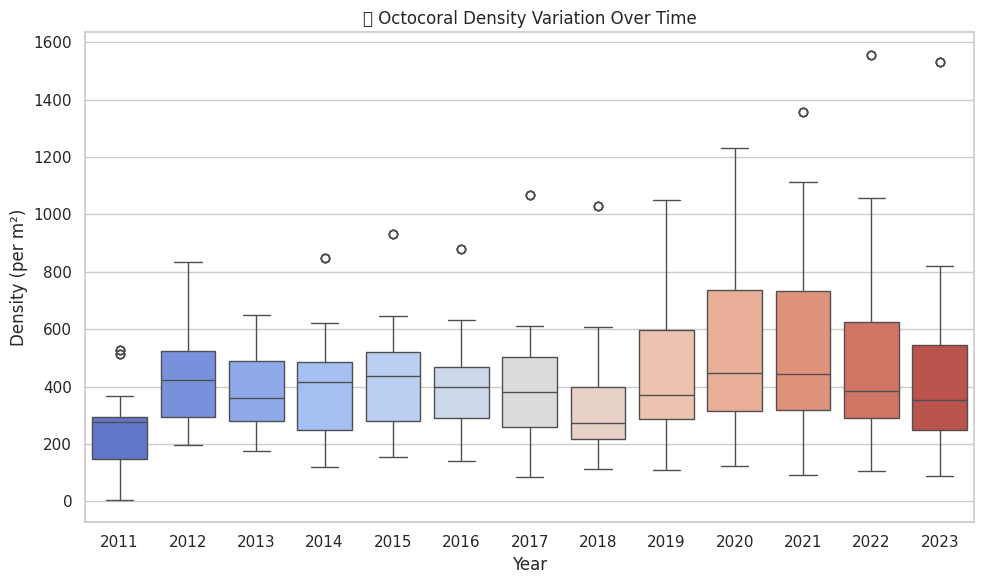

In [ ]:
# For demonstration, assume each record represents 1m²
octo_density = octo_raw_df.groupby(["Year", "SiteID"]).size().reset_index(name="Density_m2")

# Merge to get Site_Code
octo_density = octo_density.merge(site_df[['SiteID', 'Site_Code']], on='SiteID', how='left')

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=octo_density, x="Year", y="Density_m2", palette="coolwarm")
plt.title("🪸 Octocoral Density Variation Over Time")
plt.ylabel("Density (per m²)")
plt.tight_layout()
plt.show()


## 🧫 5. Living Tissue Area (Proxy: Average Diameter)

<ipython-input-9-94ef2a083da1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tissue_area, x="Site_Code", y="Diameter_cm", palette="cubehelix")
<ipython-input-9-94ef2a083da1>:11: UserWarning: Glyph 129515 (\N{PETRI DISH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129515 (\N{PETRI DISH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


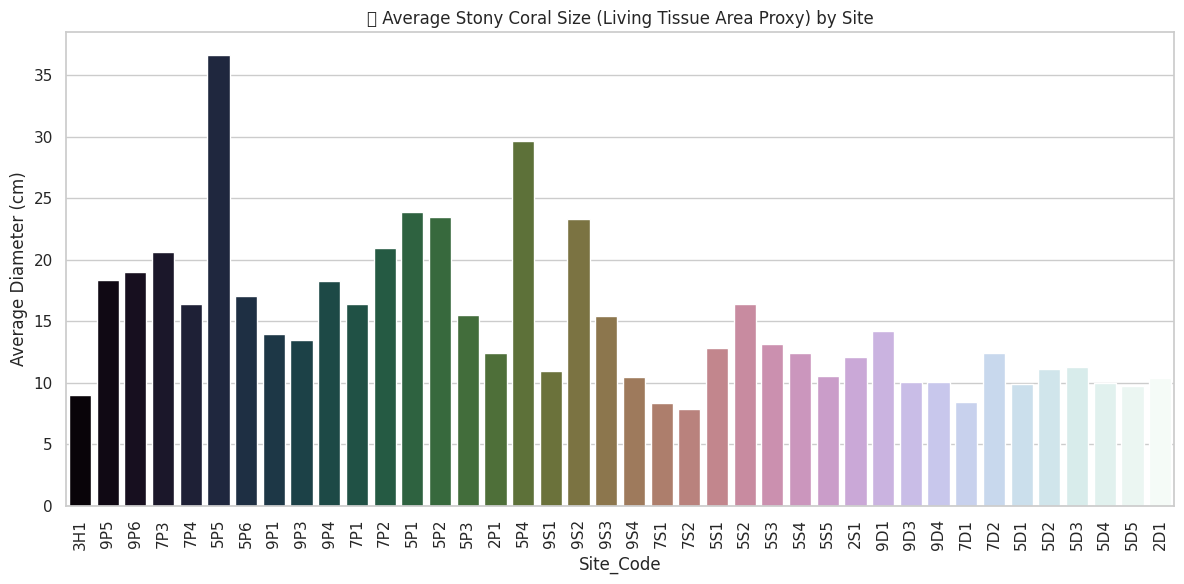

In [ ]:
# Group by site for average size (Diameter_cm)
tissue_area = stony_raw_df.groupby("SiteID")["Diameter_cm"].mean().reset_index()
tissue_area = tissue_area.merge(site_df[['SiteID', 'Site_Code']], on="SiteID", how="left")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=tissue_area, x="Site_Code", y="Diameter_cm", palette="cubehelix")
plt.xticks(rotation=90)
plt.title("🧫 Average Stony Coral Size (Living Tissue Area Proxy) by Site")
plt.ylabel("Average Diameter (cm)")
plt.tight_layout()
plt.show()


## 🧭 6. Distribution of Top Coral Species by Region

<ipython-input-10-dac19e5583e8>:17: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


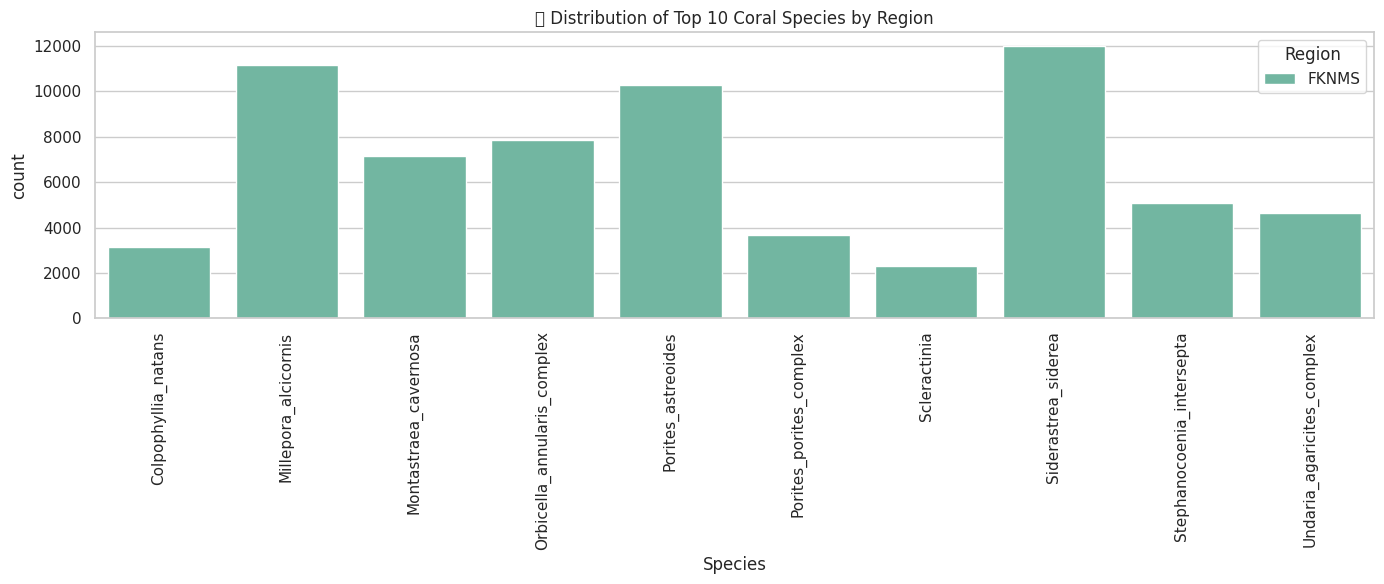

In [ ]:
# Melt and filter top species
melted_species = stony_cover_df.melt(id_vars=['SiteID'], value_vars=coral_columns, var_name='Species', value_name='Cover')
melted_species = melted_species[melted_species["Cover"] > 0]

# Join region info
melted_species = melted_species.merge(site_df[['SiteID', 'Region']], on='SiteID', how='left')

# Top 10 species
top_species = melted_species["Species"].value_counts().nlargest(10).index
filtered_species = melted_species[melted_species["Species"].isin(top_species)]

# Plot
plt.figure(figsize=(14, 6))
sns.countplot(data=filtered_species, x="Species", hue="Region", palette="Set2")
plt.xticks(rotation=90)
plt.title("🗺️ Distribution of Top 10 Coral Species by Region")
plt.tight_layout()
plt.show()


## 🌍 7. Interactive Geo Scatter Plot (Extra)

In [ ]:
import plotly.express as px

# Merge location info
geo_df = stony_cover_df.merge(site_df[['SiteID', 'latDD', 'lonDD']], on="SiteID", how="left")

# Plot
px.scatter_geo(
    geo_df,
    lat='latDD',
    lon='lonDD',
    color='Total_Coral_Cover',
    hover_name='Site_name',
    animation_frame='Year',
    title='🌍 Coral Percent Cover at Sites (Animated by Year)',
    projection='natural earth',
    color_continuous_scale="Turbo"
).show()

# 🌊 Octocoral Analysis
We'll look into:

1. Octocoral Height Trends Over Time

2. Species Richness of Octocorals

3. Height Distribution by Subregion or Habitat

4. Comparison with Stony Corals (Optional)


## 📏 1. Octocoral Height Trends Over Time

<ipython-input-12-d185d9415a6a>:11: UserWarning:

Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.



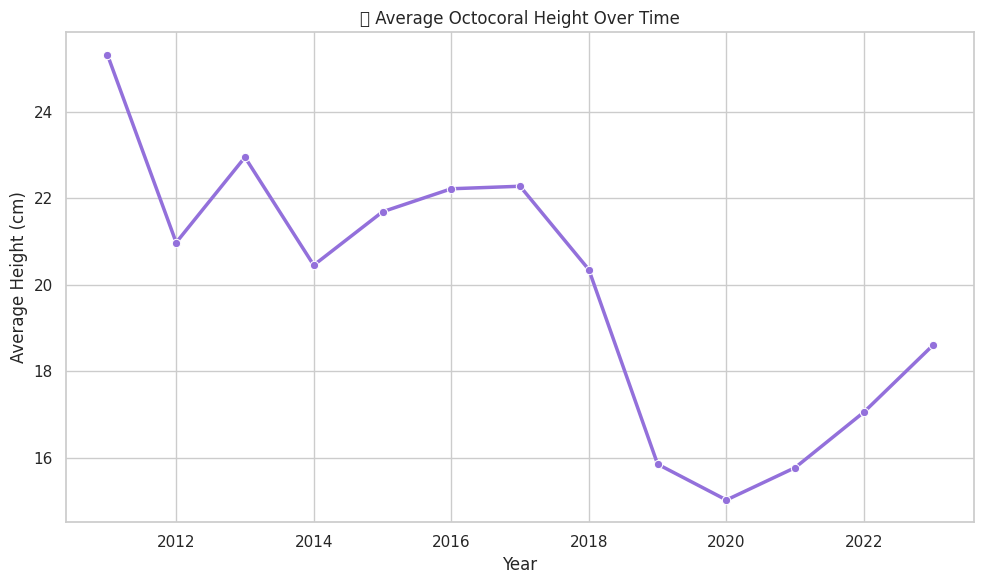

In [ ]:
# Group by Year and get average height
octo_height_trend = octo_raw_df.groupby("Year")["Height_cm"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=octo_height_trend, x="Year", y="Height_cm", marker="o", linewidth=2.5, color="mediumpurple")
plt.title("📏 Average Octocoral Height Over Time")
plt.xlabel("Year")
plt.ylabel("Average Height (cm)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🌱 2. Octocoral Species Richness Over Time

<ipython-input-13-2b8a5cea9f3f>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-13-2b8a5cea9f3f>:15: UserWarning:

Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.



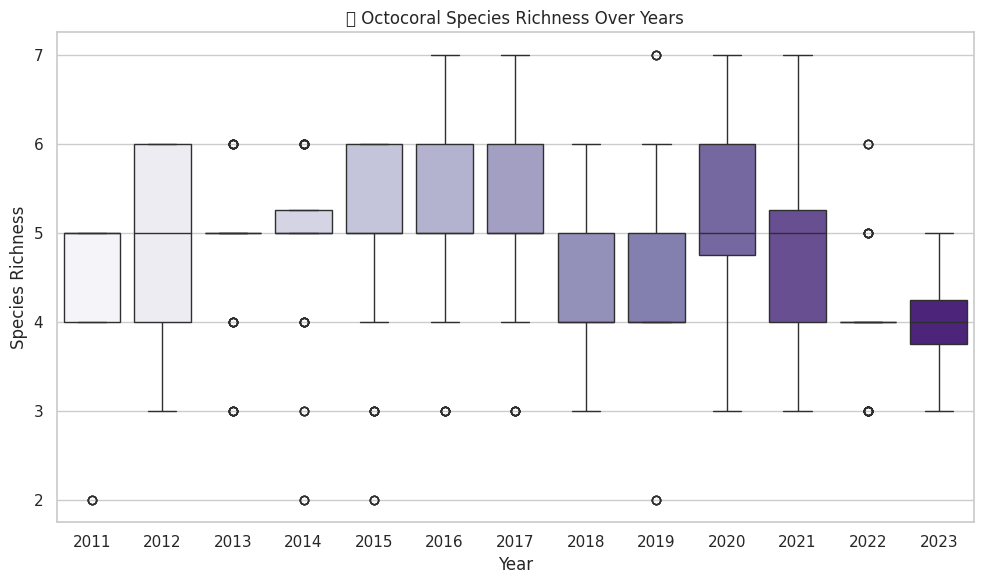

In [ ]:
# Remove 0-height entries if any
valid_octo = octo_raw_df[octo_raw_df["Height_cm"] > 0]

# Group by Year and SiteID, then count unique species
octo_richness = valid_octo.groupby(["Year", "SiteID"])["sciName"].nunique().reset_index(name="SpeciesRichness")

# Merge Site_Code
octo_richness = octo_richness.merge(site_df[["SiteID", "Site_Code"]], on="SiteID", how="left")

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=octo_richness, x="Year", y="SpeciesRichness", palette="Purples")
plt.title("🌱 Octocoral Species Richness Over Years")
plt.ylabel("Species Richness")
plt.tight_layout()
plt.show()


## 🏝️ 3. Octocoral Height by Habitat

<ipython-input-14-d236b5f4b61f>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-14-d236b5f4b61f>:15: UserWarning:

Glyph 127965 (\N{DESERT ISLAND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127965 (\N{DESERT ISLAND}) missing from font(s) DejaVu Sans.



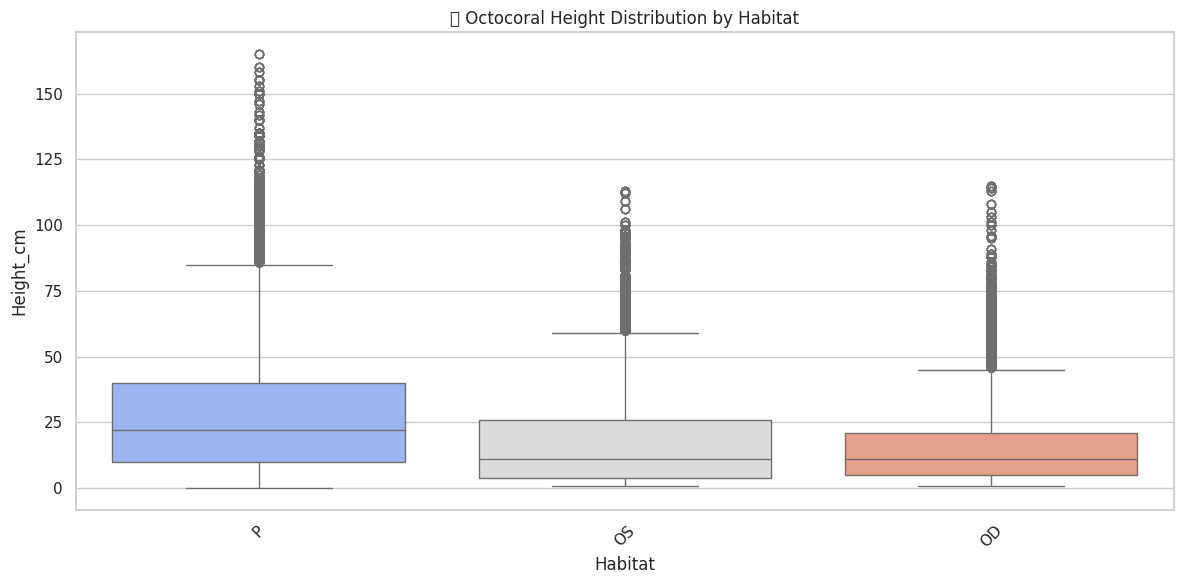

In [ ]:
# Merge and fix Habitat column naming
octo_habitat = pd.merge(octo_raw_df, site_df[['SiteID', 'Habitat']], on='SiteID', how='left')

# Use Habitat_y (from site_df), since it’s likely more standardized
octo_habitat['Habitat'] = octo_habitat['Habitat_y']

# Drop rows where Habitat is still missing (just in case)
octo_habitat = octo_habitat.dropna(subset=["Habitat"])

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=octo_habitat, x="Habitat", y="Height_cm", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("🏝️ Octocoral Height Distribution by Habitat")
plt.tight_layout()
plt.show()


## 📊 4. Octocoral vs Stony Coral Height Comparison (Extra)

<ipython-input-15-10d90a9b6052>:15: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



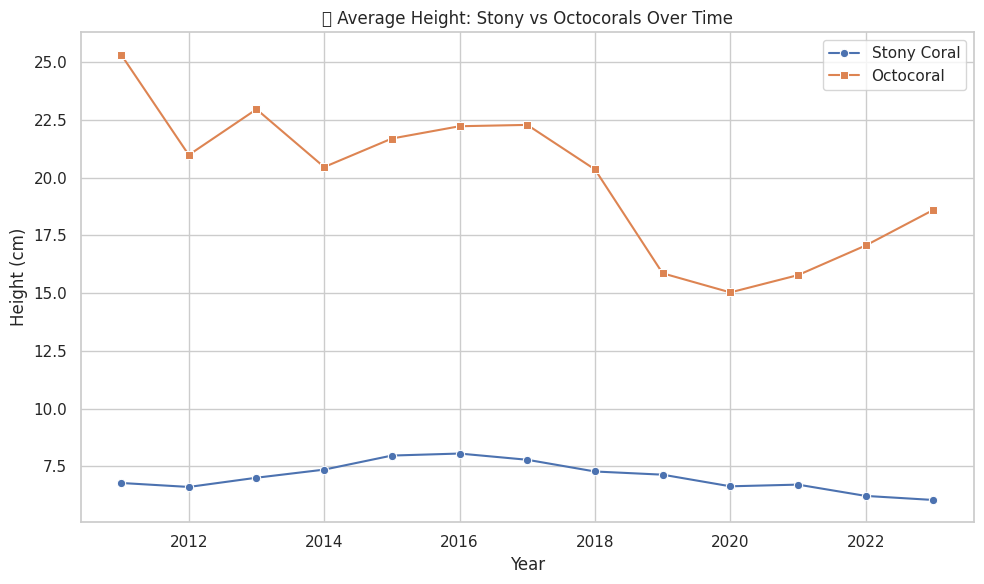

In [ ]:
# Average height from stony raw (non-zero)
stony_height = stony_raw_df[stony_raw_df["Height_cm"] > 0].groupby("Year")["Height_cm"].mean().reset_index(name="StonyHeight")
octo_height = octo_raw_df[octo_raw_df["Height_cm"] > 0].groupby("Year")["Height_cm"].mean().reset_index(name="OctocoralHeight")

# Merge
height_compare = pd.merge(stony_height, octo_height, on="Year", how="inner")

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=height_compare, x="Year", y="StonyHeight", label="Stony Coral", marker="o")
sns.lineplot(data=height_compare, x="Year", y="OctocoralHeight", label="Octocoral", marker="s")
plt.title("📊 Average Height: Stony vs Octocorals Over Time")
plt.ylabel("Height (cm)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


# 🧫 4. Living Tissue Area Proxy (Using Coral Size)

<ipython-input-16-aeab67ab3c7d>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-16-aeab67ab3c7d>:19: UserWarning:

Glyph 129515 (\N{PETRI DISH}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129515 (\N{PETRI DISH}) missing from font(s) DejaVu Sans.



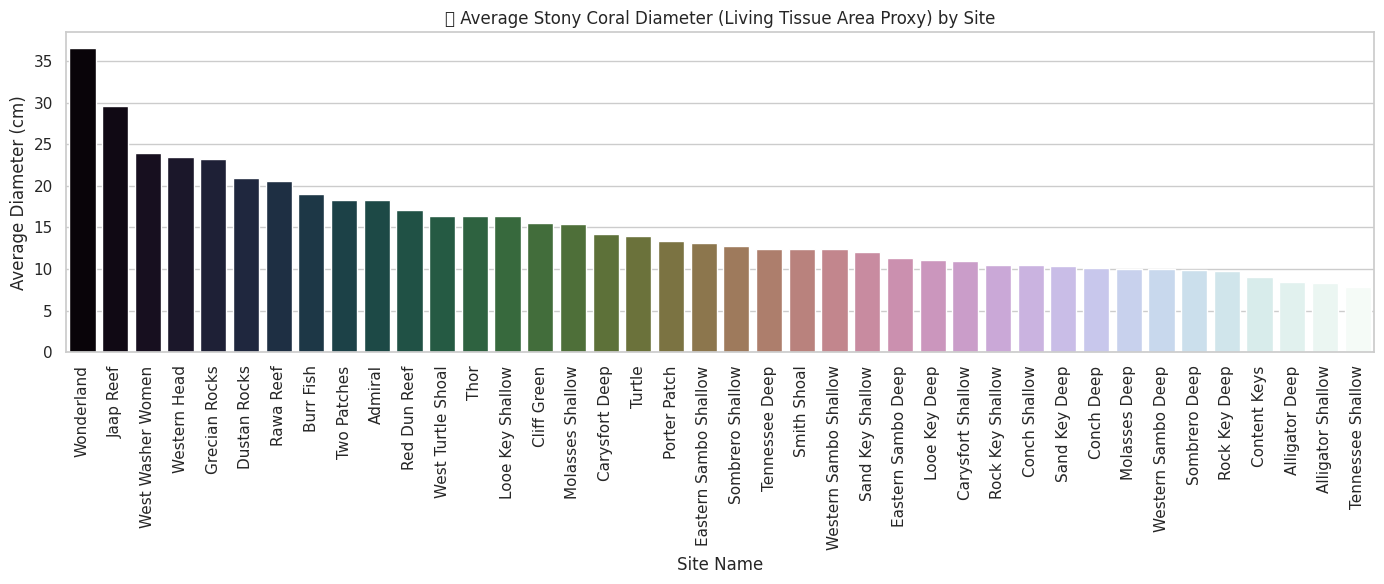

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 🧫 4. Living Tissue Area Proxy ---

# Group by Site_name and compute average coral diameter
tissue_area = stony_raw_df.groupby("Site_name")["Diameter_cm"].mean().reset_index()

# Sort sites by average diameter
tissue_area = tissue_area.sort_values(by="Diameter_cm", ascending=False)

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(data=tissue_area, x="Site_name", y="Diameter_cm", palette="cubehelix")
plt.xticks(rotation=90)
plt.title("🧫 Average Stony Coral Diameter (Living Tissue Area Proxy) by Site")
plt.ylabel("Average Diameter (cm)")
plt.xlabel("Site Name")
plt.tight_layout()
plt.show()


# 🌎 5. Spatial Distribution of Top Stony Coral Species

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.



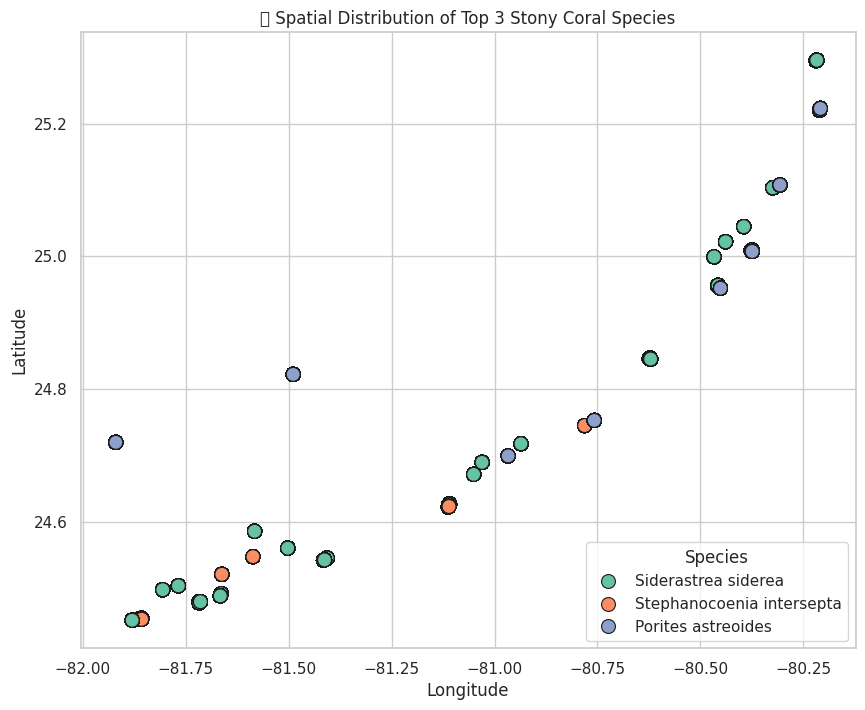

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 🌎 5. Spatial Distribution of Top Stony Coral Species ---

# Step 1: Get the top 3 species based on frequency
top_species = stony_raw_df["sciName"].value_counts().nlargest(3).index.tolist()

# Step 2: Filter the raw stony coral data for those species
top_species_df = stony_raw_df[stony_raw_df["sciName"].isin(top_species)]

# Step 3: Merge with site_df to get coordinates
top_species_geo = top_species_df.merge(site_df[["SiteID", "latDD", "lonDD"]], on="SiteID", how="left")

# Step 4: Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=top_species_geo, x="lonDD", y="latDD", hue="sciName", palette="Set2", s=100, edgecolor='k')
plt.title("🗺️ Spatial Distribution of Top 3 Stony Coral Species")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Species", loc="lower right")
plt.grid(True)
plt.show()


# 🔥 6. Temperature Trends Over Time by Site

<ipython-input-18-ddda62b67055>:32: UserWarning:

Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.



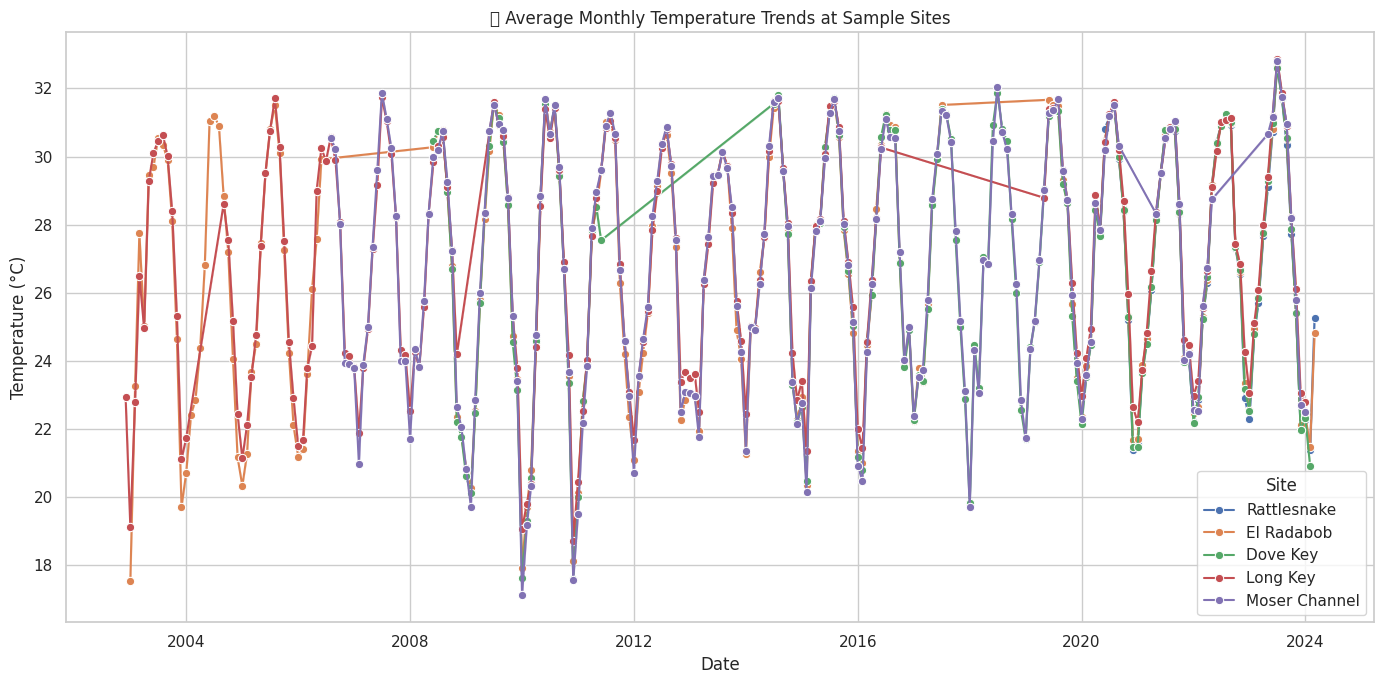

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 🔥 6. Temperature Trends Over Time by Site ---

# Step 1: Create a datetime column
temp_df["Date"] = pd.to_datetime(temp_df[["Year", "Month", "Day"]])

# Step 2: Group by Site and Month to get average monthly temp
temp_df["Month_Year"] = temp_df["Date"].dt.to_period("M")
monthly_avg_temp = temp_df.groupby(["SiteID", "Month_Year"])["TempC"].mean().reset_index()

# Convert Month_Year back to datetime for plotting
monthly_avg_temp["Month_Year"] = monthly_avg_temp["Month_Year"].dt.to_timestamp()

# Step 3: Merge with site_df for site names
monthly_avg_temp = monthly_avg_temp.merge(site_df[["SiteID", "Site_name"]], on="SiteID", how="left")

# Step 4: Select a few sample sites to avoid clutter
sample_sites = monthly_avg_temp["Site_name"].dropna().unique()[:5]  # You can change number of sites if needed
plot_df = monthly_avg_temp[monthly_avg_temp["Site_name"].isin(sample_sites)]

# Step 5: Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=plot_df, x="Month_Year", y="TempC", hue="Site_name", marker="o")
plt.title("🌡️ Average Monthly Temperature Trends at Sample Sites")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend(title="Site")
plt.grid(True)
plt.tight_layout()
plt.show()


# 🌡️🪸 7. Temperature vs. Coral Cover: Is There a Link?

<ipython-input-19-644583a8812b>:23: UserWarning:

Glyph 129720 (\N{CORAL}) missing from font(s) DejaVu Sans.

<ipython-input-19-644583a8812b>:23: UserWarning:

Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.

<ipython-input-19-644583a8812b>:23: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129720 (\N{CORAL}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.



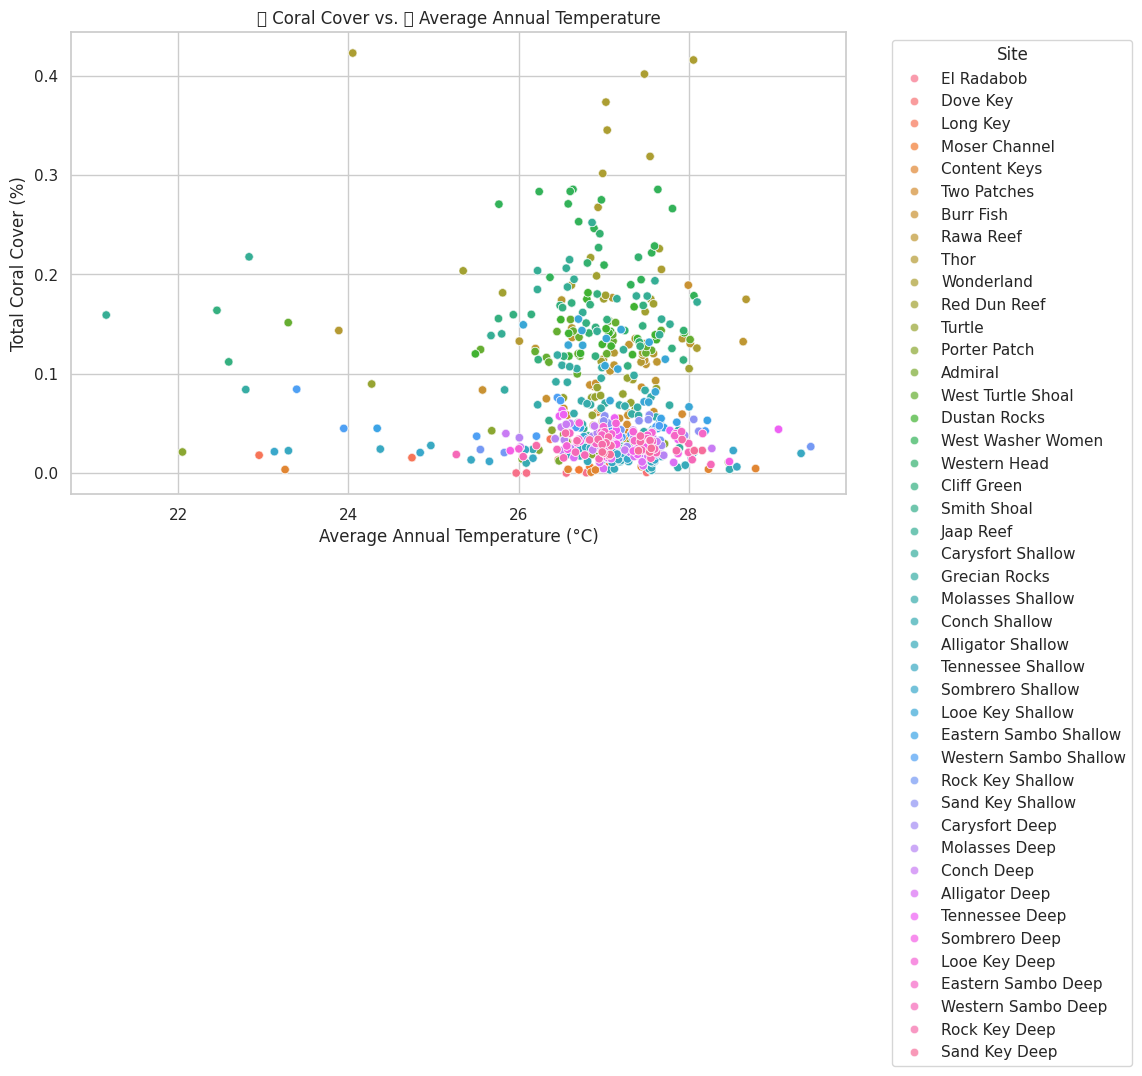

In [ ]:
# --- 🌡️🪸 7. Temperature vs. Coral Cover ---

# Step 1: Average temperature per site per year
avg_temp_by_site_year = temp_df.groupby(["SiteID", "Year"])["TempC"].mean().reset_index()
avg_temp_by_site_year.rename(columns={"TempC": "Avg_Annual_TempC"}, inplace=True)

# Step 2: Average coral cover per site per year
avg_cover_by_site_year = stony_cover_df.groupby(["SiteID", "Year"])["Total_Coral_Cover"].mean().reset_index()

# Step 3: Merge temperature and coral cover data
temp_cover_df = pd.merge(avg_temp_by_site_year, avg_cover_by_site_year, on=["SiteID", "Year"], how="inner")

# Step 4: Merge site names (optional, for labeling)
temp_cover_df = pd.merge(temp_cover_df, site_df[["SiteID", "Site_name"]], on="SiteID", how="left")

# Step 5: Plot Temperature vs Coral Cover
plt.figure(figsize=(10, 6))
sns.scatterplot(data=temp_cover_df, x="Avg_Annual_TempC", y="Total_Coral_Cover", hue="Site_name", alpha=0.7)
plt.title("🪸 Coral Cover vs. 🌡️ Average Annual Temperature")
plt.xlabel("Average Annual Temperature (°C)")
plt.ylabel("Total Coral Cover (%)")
plt.legend(title="Site", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


# 📊 Octocoral Density Over Time and Across Stations

<ipython-input-20-0d1921bdc321>:15: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



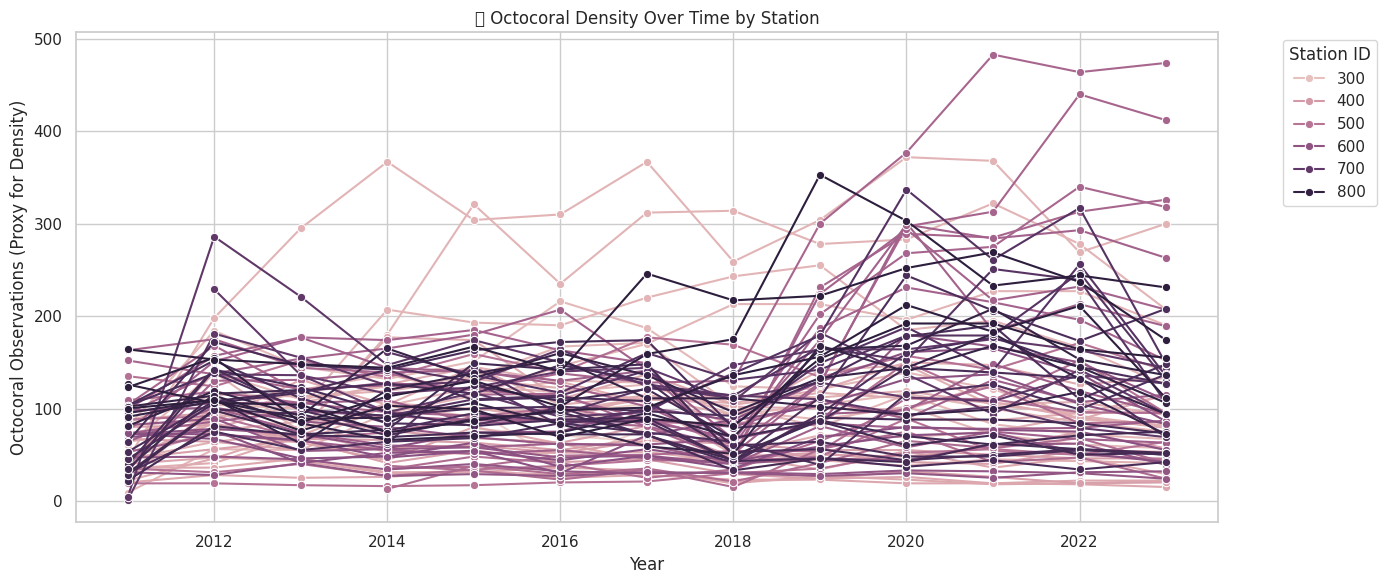

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count of octocoral entries grouped by Station and Year (as proxy for density)
octo_density = octo_raw_df.groupby(['Year', 'StationID']).size().reset_index(name='Octocoral_Count')

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=octo_density, x='Year', y='Octocoral_Count', hue='StationID', marker='o')
plt.title("📈 Octocoral Density Over Time by Station")
plt.ylabel("Octocoral Observations (Proxy for Density)")
plt.xlabel("Year")
plt.legend(title="Station ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


# 🗺️ Assess Spatial Patterns in the Distribution of Different Coral Species and How These Patterns Change Over Time

<ipython-input-21-70dcfe588f08>:25: UserWarning:

Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.



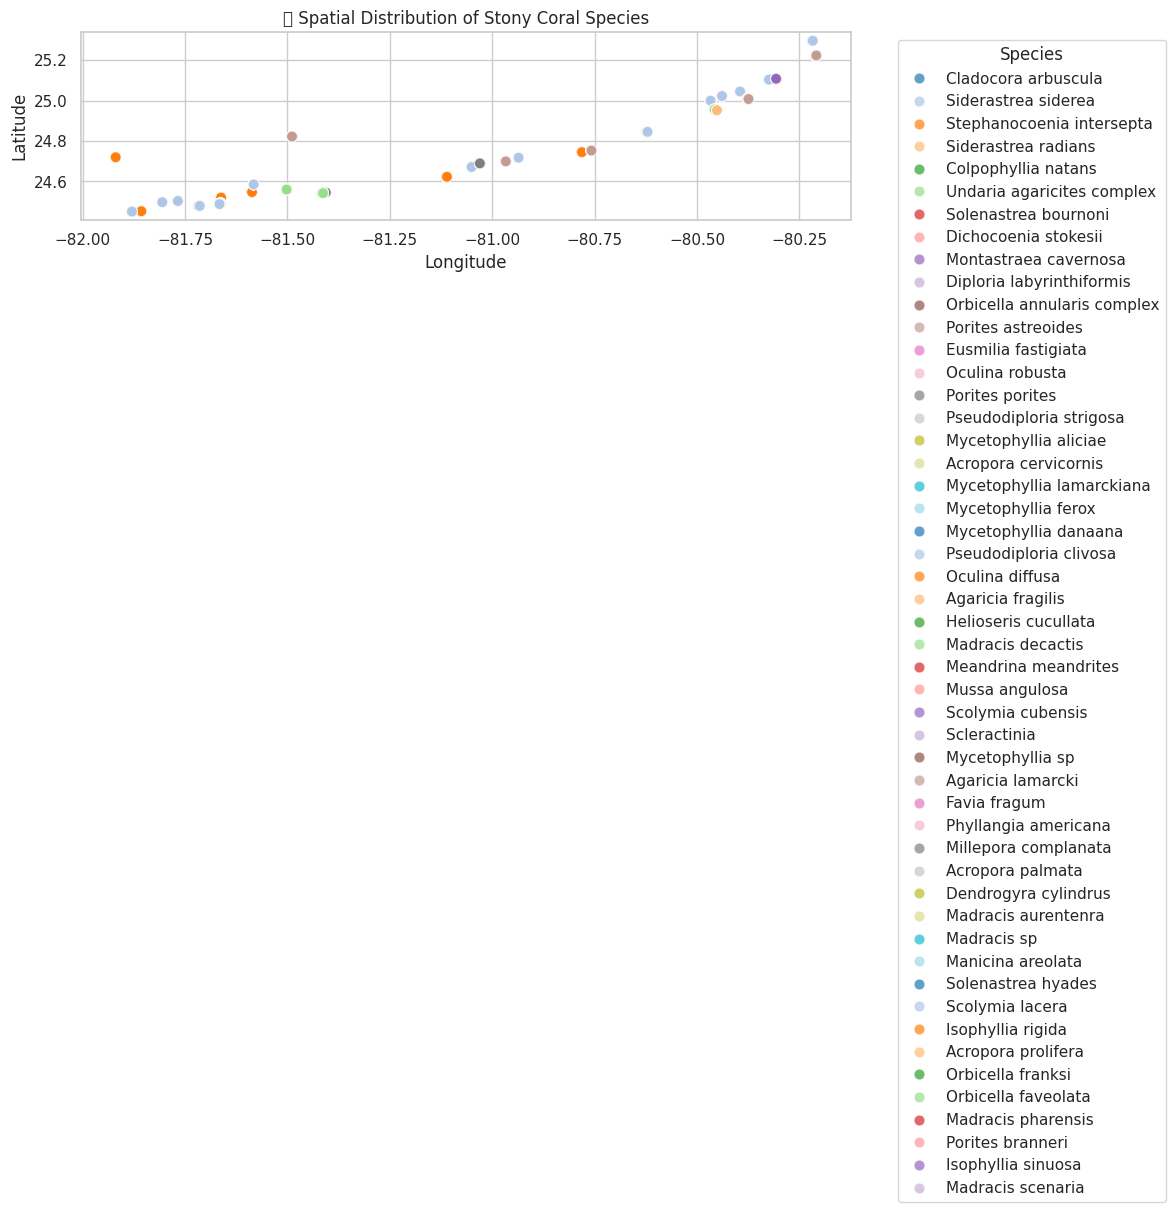

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge stony_raw_df with site_df to get coordinates
stony_geo = pd.merge(stony_raw_df, site_df[['SiteID', 'latDD', 'lonDD']], on='SiteID', how='left')

# Filter for a specific year or plot all (optional filter below)
# stony_geo = stony_geo[stony_geo["Year"] == 2022]  # optional

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=stony_geo,
    x='lonDD', y='latDD',
    hue='sciName',
    palette='tab20',
    alpha=0.7,
    s=60
)

plt.title("🗺️ Spatial Distribution of Stony Coral Species")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# 🔗 Assess the Relationship Between Stony Coral Density and Species Richness Within Sites
We’ll:

1. Calculate stony coral density as total living tissue area (LTA) per site per year from stony_raw_df.

2. Calculate species richness per site per year from the same DataFrame.

3. Merge and visualize correlation via scatter plot and regression line.



<ipython-input-22-325711390393>:37: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.



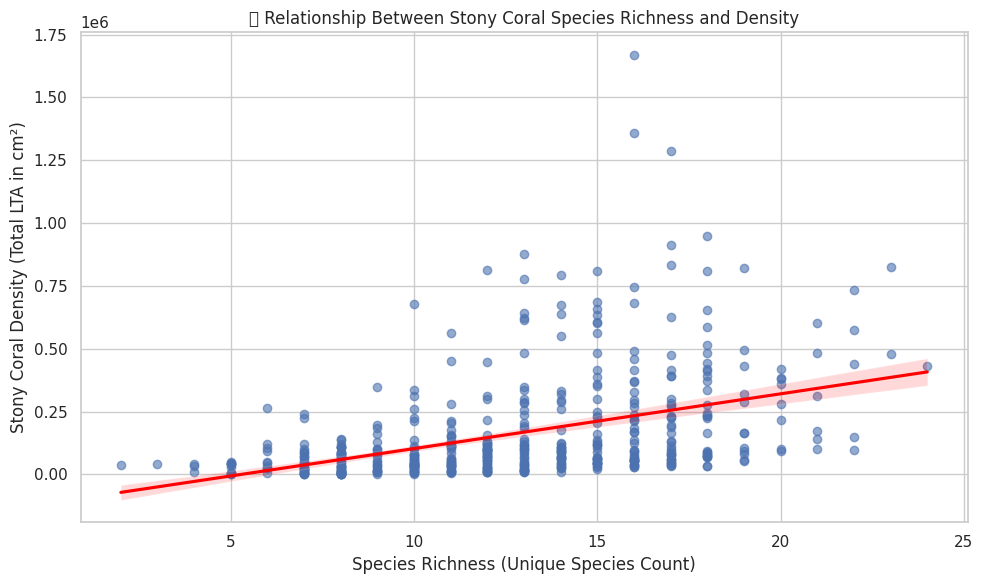

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Calculate species richness (unique species per site-year)
richness_df = (
    stony_raw_df.groupby(["SiteID", "Year"])["sciName"]
    .nunique()
    .reset_index()
    .rename(columns={"sciName": "SpeciesRichness"})
)

# --- 2. Calculate density as total LTA per site-year
density_df = (
    stony_raw_df.groupby(["SiteID", "Year"])["LTA_cm2"]
    .sum()
    .reset_index()
    .rename(columns={"LTA_cm2": "Total_LTA_cm2"})
)

# --- 3. Merge both
richness_density_df = pd.merge(richness_df, density_df, on=["SiteID", "Year"])

# --- 4. Plot correlation
plt.figure(figsize=(10, 6))
sns.regplot(
    data=richness_density_df,
    x="SpeciesRichness",
    y="Total_LTA_cm2",
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"},
)

plt.title("🔗 Relationship Between Stony Coral Species Richness and Density")
plt.xlabel("Species Richness (Unique Species Count)")
plt.ylabel("Stony Coral Density (Total LTA in cm²)")
plt.grid(True)
plt.tight_layout()
plt.show()


# 🌡️ Evaluate Correlations Between Octocoral Density and Water Temperature
We’ll:

1. Aggregate Octocoral density (using height as a proxy, since count data isn't present) per site per year.

2. Aggregate water temperature per site per year.

3. Merge the two and plot their relationship.



<ipython-input-24-1f990dc97e9f>:36: UserWarning:

Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.



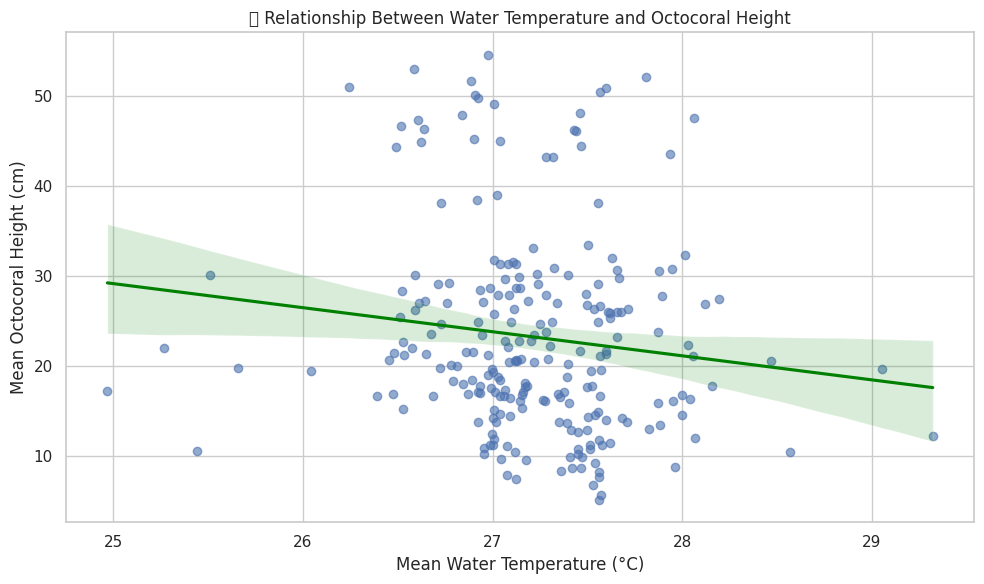

In [ ]:
#📊 Code for Octocoral Density vs. Water Temperature

# --- 1. Octocoral Density Proxy: Mean Height per Site-Year
octo_density = (
    octo_raw_df.groupby(["SiteID", "Year"])["Height_cm"]
    .mean()
    .reset_index()
    .rename(columns={"Height_cm": "Mean_Octo_Height_cm"})
)

# --- 2. Temperature: Mean Temp per Site-Year
temp_summary = (
    temp_df.groupby(["SiteID", "Year"])["TempC"]
    .mean()
    .reset_index()
    .rename(columns={"TempC": "Mean_TempC"})
)

# --- 3. Merge
octo_temp_corr = pd.merge(octo_density, temp_summary, on=["SiteID", "Year"])

# --- 4. Plot correlation
plt.figure(figsize=(10, 6))
sns.regplot(
    data=octo_temp_corr,
    x="Mean_TempC",
    y="Mean_Octo_Height_cm",
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "green"},
)

plt.title("🌡️ Relationship Between Water Temperature and Octocoral Height")
plt.xlabel("Mean Water Temperature (°C)")
plt.ylabel("Mean Octocoral Height (cm)")
plt.grid(True)
plt.tight_layout()
plt.show()


# 📍 Regional Comparison (10 points)
✅ Task:
Observe and analyze differences between stations in coral reef parameters—density, species composition, and percent cover—and how these parameters evolve over time.

We’ll break this into 3 parts:

1. Density comparison of stony corals across subregions.

2. Species composition (relative abundance of dominant species by subregion).

3. Percent cover trends over time by subregion.



## 🔹 Part 1: Stony Coral Density by Subregion
We'll use stony_raw_df and compute coral density as count per site per year.

<ipython-input-25-6c8606557296>:23: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.



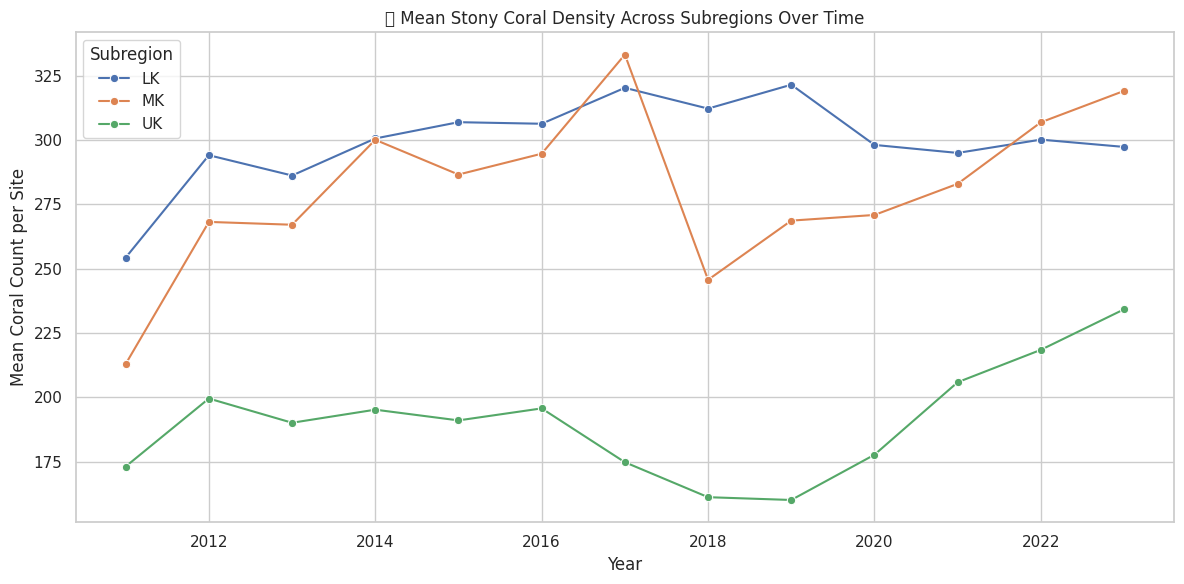

In [ ]:
# --- 1. Coral Density per Site-Year
density_df = (
    stony_raw_df.groupby(["Subregion", "Year", "SiteID"])
    .size()
    .reset_index(name="Coral_Count")
)

# --- 2. Mean Density per Subregion-Year
mean_density = (
    density_df.groupby(["Subregion", "Year"])["Coral_Count"]
    .mean()
    .reset_index(name="Mean_Coral_Density")
)

# --- 3. Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_density, x="Year", y="Mean_Coral_Density", hue="Subregion", marker="o")

plt.title("📍 Mean Stony Coral Density Across Subregions Over Time")
plt.xlabel("Year")
plt.ylabel("Mean Coral Count per Site")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Subregion")
plt.show()


## 🧬 Part 2: Species Composition by Subregion
We’ll analyze the relative abundance of stony coral species per subregion using stony_raw_df.

✅ Goal:
Visualize the top 5 most common species and how their relative abundance differs across subregions.

🧪 Code:

<ipython-input-26-ee03597945b1>:44: UserWarning:

Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.



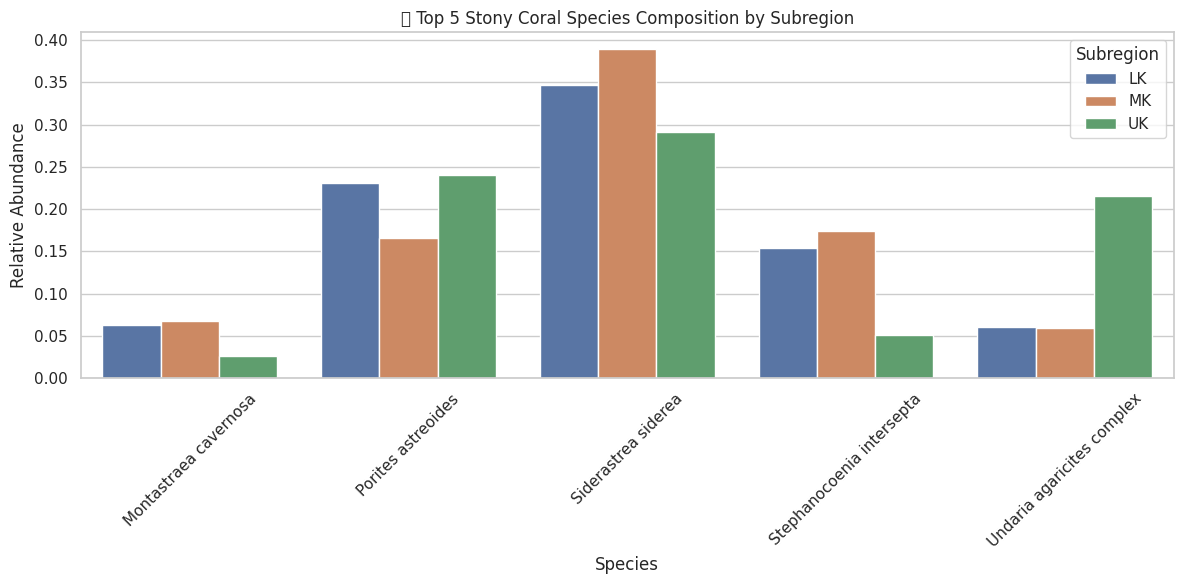

In [ ]:
# --- 1. Count of species occurrences by subregion
species_counts = (
    stony_raw_df.groupby(["Subregion", "sciName"])
    .size()
    .reset_index(name="Count")
)

# --- 2. Calculate total observations per subregion
total_by_subregion = (
    species_counts.groupby("Subregion")["Count"]
    .sum()
    .reset_index(name="Total")
)

# --- 3. Merge to calculate relative abundance
species_abundance = pd.merge(species_counts, total_by_subregion, on="Subregion")
species_abundance["Relative_Abundance"] = (
    species_abundance["Count"] / species_abundance["Total"]
)

# --- 4. Focus on top 5 species overall
top_species = (
    stony_raw_df["sciName"]
    .value_counts()
    .head(5)
    .index.tolist()
)
filtered_abundance = species_abundance[species_abundance["sciName"].isin(top_species)]

# --- 5. Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_abundance,
    x="sciName",
    y="Relative_Abundance",
    hue="Subregion"
)

plt.title("🧬 Top 5 Stony Coral Species Composition by Subregion")
plt.xlabel("Species")
plt.ylabel("Relative Abundance")
plt.xticks(rotation=45)
plt.legend(title="Subregion")
plt.tight_layout()
plt.show()


## 🌍 Part 3: Percent Coral Cover Trends by Subregion
We’ll visualize how total coral cover (from stony_cover_df) changes over time by subregion.

🎯 Goal:
Assess how coral cover is evolving across different subregions.

🧪 Code:

<ipython-input-27-a801f62d48e7>:24: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



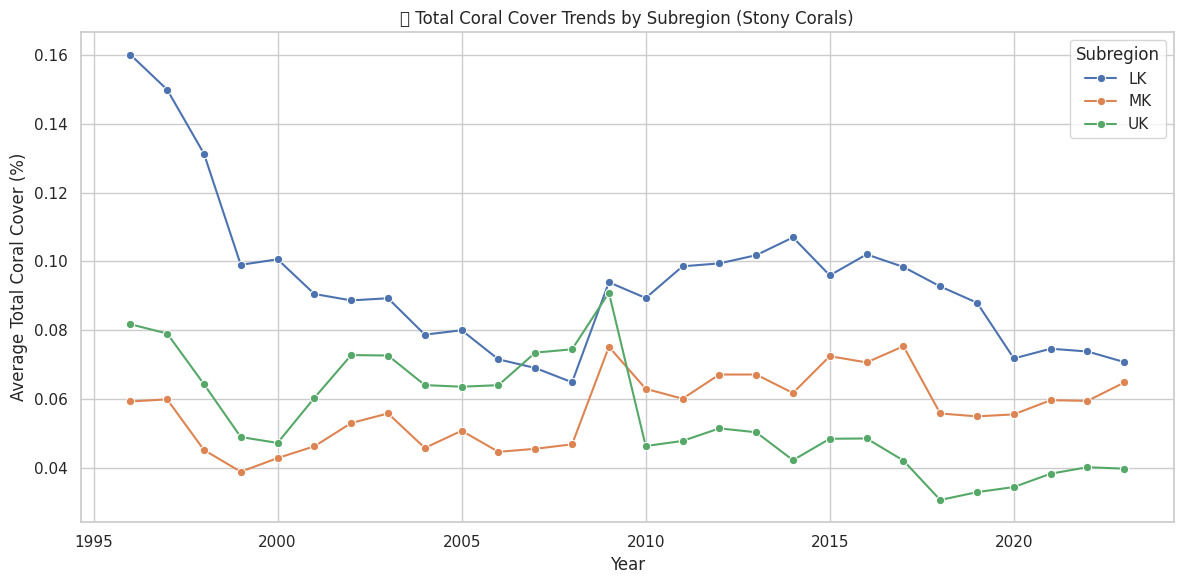

In [ ]:
# --- 1. Group by year and subregion to get mean coral cover
cover_trend = (
    stony_cover_df
    .groupby(["Year", "Subregion"])["Total_Coral_Cover"]
    .mean()
    .reset_index()
)

# --- 2. Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=cover_trend,
    x="Year",
    y="Total_Coral_Cover",
    hue="Subregion",
    marker="o"
)

plt.title("📈 Total Coral Cover Trends by Subregion (Stony Corals)")
plt.xlabel("Year")
plt.ylabel("Average Total Coral Cover (%)")
plt.legend(title="Subregion")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🗺️ Step 4: Regional Comparison

✅ Goals:
* Stony Coral Density by Region Over Time

* Species Richness by Region Over Time

* Species Composition by Region (Heatmap)

* Multivariate Comparison (PCA / t-SNE or Cluster Map)

🧠 Interpretation Ideas:
* Line plots show how different regions are evolving over time.

* Heatmaps reveal dominant coral species in each region.

* PCA highlights similarities or ecological uniqueness of stations.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Merge region info into stony_raw_df and stony_cover_df
stony_raw_df = stony_raw_df.merge(site_df[['SiteID', 'Region']], on='SiteID', how='left')
stony_cover_df = stony_cover_df.merge(site_df[['SiteID', 'Region']], on='SiteID', how='left')


### 🧱 1. Stony Coral Density by Region Over Time

<ipython-input-30-2ed6345bfb2f>:8: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



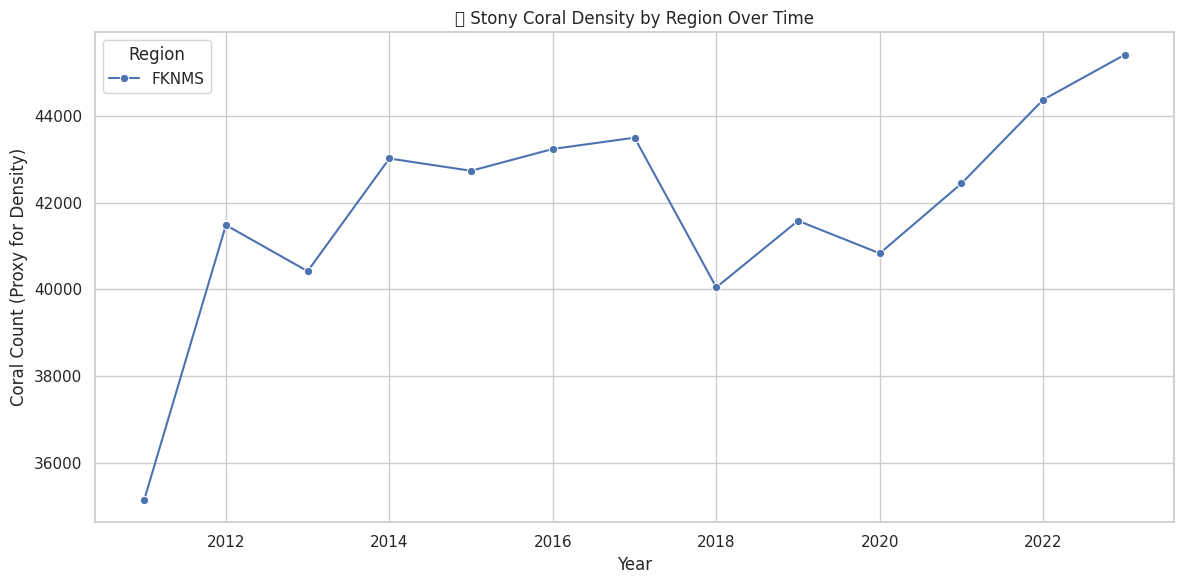

In [ ]:
# Count of coral records per site-year-region
density_by_region = stony_raw_df.groupby(["Year", "Region"])["sciName"].count().reset_index(name="Stony_Coral_Density")

plt.figure(figsize=(12,6))
sns.lineplot(data=density_by_region, x="Year", y="Stony_Coral_Density", hue="Region", marker="o")
plt.title("📊 Stony Coral Density by Region Over Time")
plt.ylabel("Coral Count (Proxy for Density)")
plt.tight_layout()
plt.show()


### 🌿 2. Species Richness by Region Over Time

<ipython-input-31-040cd7116c34>:7: UserWarning:

Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.



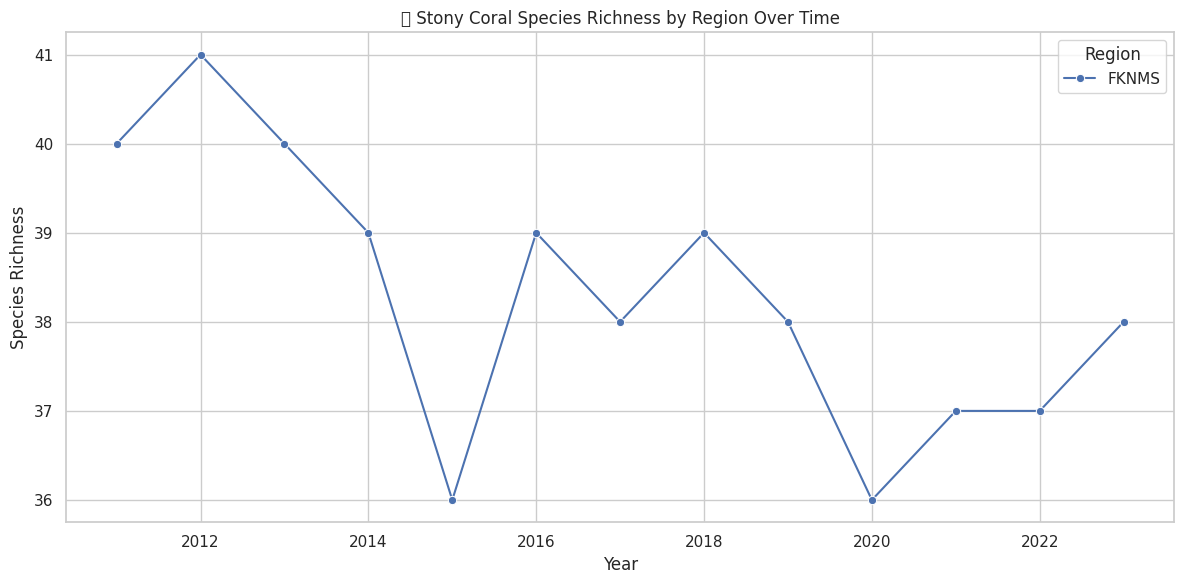

In [ ]:
richness_by_region = stony_raw_df.groupby(["Year", "Region"])["sciName"].nunique().reset_index(name="Species_Richness")

plt.figure(figsize=(12,6))
sns.lineplot(data=richness_by_region, x="Year", y="Species_Richness", hue="Region", marker="o")
plt.title("🌿 Stony Coral Species Richness by Region Over Time")
plt.ylabel("Species Richness")
plt.tight_layout()
plt.show()


### 🎯 3. Species Composition Heatmap (By Region)

<ipython-input-32-a7327b5134e8>:18: UserWarning:

Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.



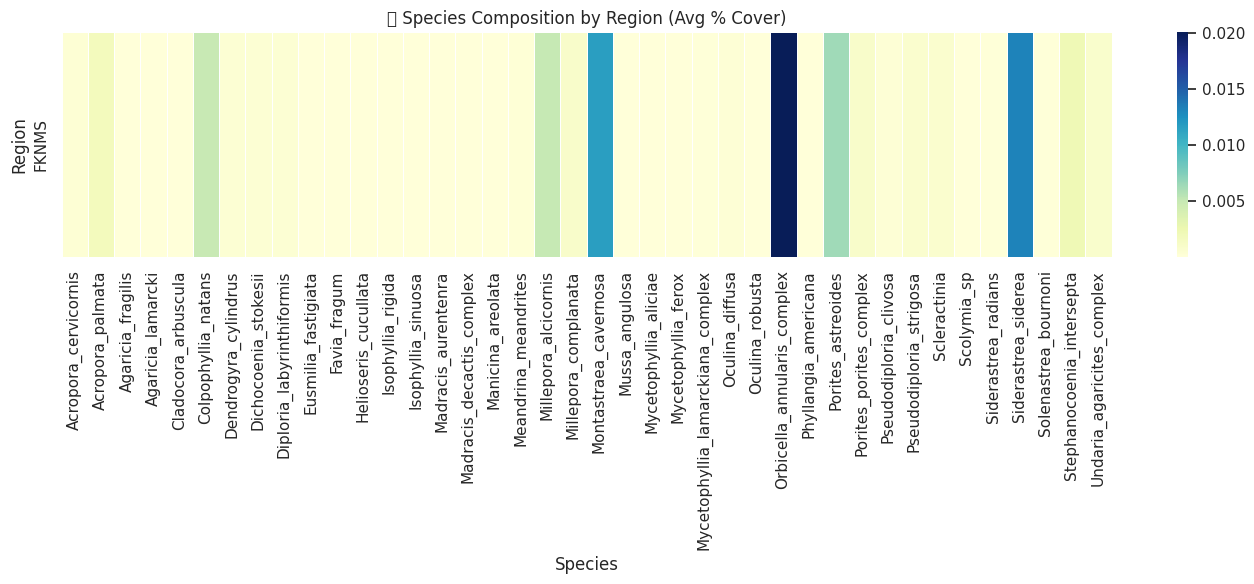

In [ ]:
# Melt stony_cover_df to long format
melted_cover = stony_cover_df.melt(id_vars=["Year", "Region", "SiteID"], value_vars=coral_columns,
                                   var_name="Species", value_name="Cover")

# Sum species cover by Region
composition = melted_cover.groupby(["Region", "Species"])["Cover"].mean().reset_index()

# Pivot to get heatmap format
composition_pivot = composition.pivot(index="Region", columns="Species", values="Cover").fillna(0)

# Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(composition_pivot, cmap="YlGnBu", linewidths=0.5)
plt.title("🔬 Species Composition by Region (Avg % Cover)")
plt.xlabel("Species")
plt.ylabel("Region")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### 🧬 4. PCA for Regional Station Clustering (Extra)

<ipython-input-33-d384343dcf14>:23: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.



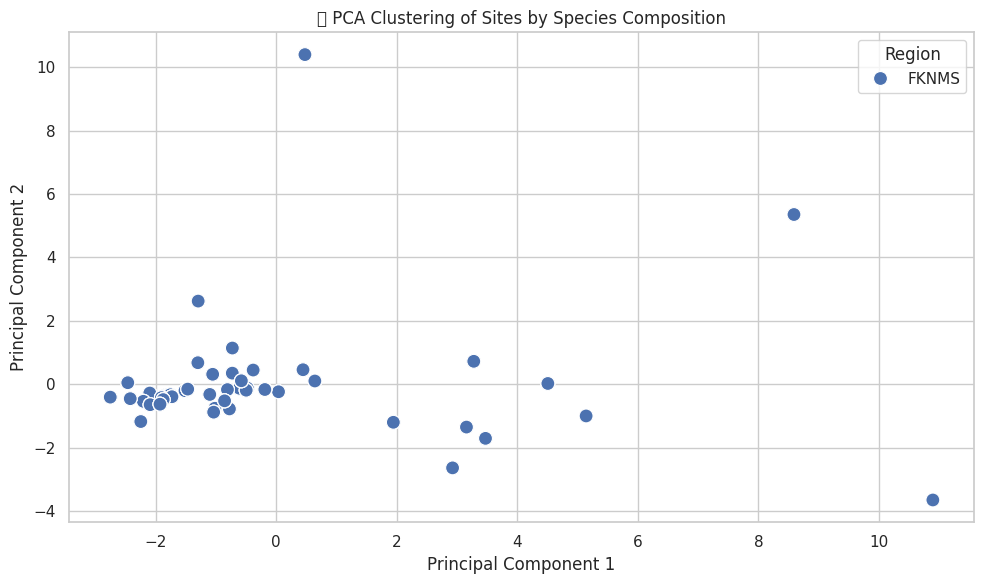

In [ ]:
# Prep PCA input: average % cover of species per site
pca_df = stony_cover_df.groupby("SiteID")[coral_columns].mean().reset_index()
pca_df = pd.merge(pca_df, site_df[["SiteID", "Region", "Site_Code"]], on="SiteID", how="left")

# Standardize features
X = StandardScaler().fit_transform(pca_df[coral_columns])

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X)

# Create plot dataframe
pca_plot_df = pd.DataFrame(components, columns=["PC1", "PC2"])
pca_plot_df["Region"] = pca_df["Region"]
pca_plot_df["Site_Code"] = pca_df["Site_Code"]

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_plot_df, x="PC1", y="PC2", hue="Region", style="Region", s=100)
plt.title("📌 PCA Clustering of Sites by Species Composition")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()


# 🔮 Step 5: Future Outlook (40 Points)

## 🔹 5.1 — Identify Key Factors (5 pts)
We'll use feature importance from a random forest model to see which variables (e.g., temperature, species richness, site, year, region) influence total coral cover most.

📌 Feature Importances:
SpeciesRichness      0.558947
Year                 0.247274
Subregion_encoded    0.193778
Region_encoded       0.000000
dtype: float64


<ipython-input-34-3367d691dea9>:38: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



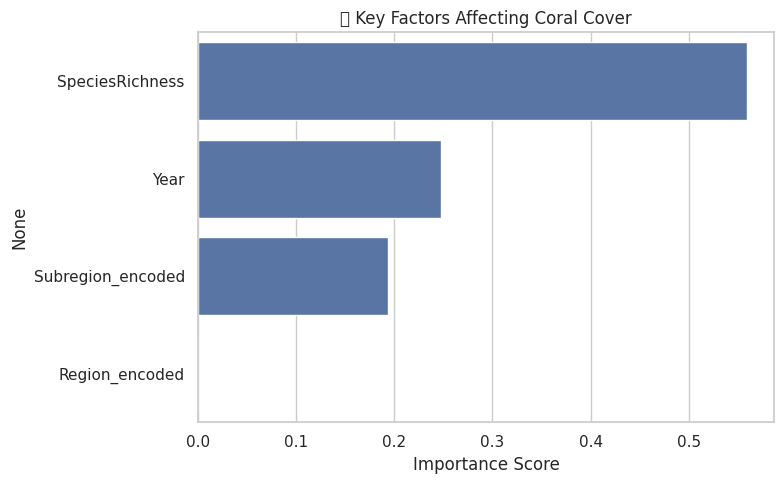

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Prep data
model_df = stony_cover_df.copy()

# Encode categorical vars
le_region = LabelEncoder()
model_df["Region_encoded"] = le_region.fit_transform(model_df["Region"].astype(str))
model_df["Subregion_encoded"] = LabelEncoder().fit_transform(model_df["Subregion"].astype(str))

# Features: year, region, richness, etc.
model_df["SpeciesRichness"] = (model_df[coral_columns] > 0).sum(axis=1)

features = ["Year", "Region_encoded", "Subregion_encoded", "SpeciesRichness"]
X = model_df[features]
y = model_df["Total_Coral_Cover"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print("📌 Feature Importances:")
print(importances)

# Visualize
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index)
plt.title("📊 Key Factors Affecting Coral Cover")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


## 🔹 5.2 — Early Warning Indicators (5 pts)
Let’s detect decline thresholds (e.g., SST > X°C → coral collapse) using a simple anomaly logic.

<ipython-input-35-5e66ced58753>:16: UserWarning:

Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.



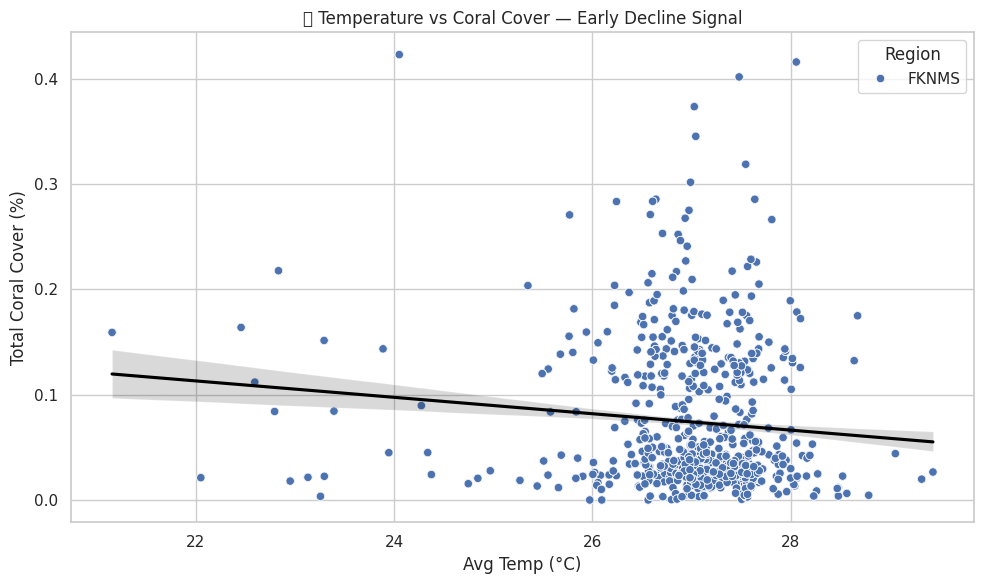

⚠️ 0 potential early warning sites detected (Temp > 30.5°C and low cover).


In [ ]:
# Merge temperature and coral data
merged_df = pd.merge(temp_df.groupby(['Year', 'SiteID'])['TempC'].mean().reset_index(),
                     stony_cover_df.groupby(['Year', 'SiteID'])['Total_Coral_Cover'].mean().reset_index(),
                     on=['Year', 'SiteID'])

# Add region info
merged_df = merged_df.merge(site_df[['SiteID', 'Region']], on='SiteID', how='left')

# Visualize correlation
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='TempC', y='Total_Coral_Cover', hue='Region')
sns.regplot(data=merged_df, x='TempC', y='Total_Coral_Cover', scatter=False, color='black')
plt.title("🌡️ Temperature vs Coral Cover — Early Decline Signal")
plt.xlabel("Avg Temp (°C)")
plt.ylabel("Total Coral Cover (%)")
plt.tight_layout()
plt.show()

# Example threshold detection
threshold = 30.5
alert_sites = merged_df[(merged_df["TempC"] > threshold) & (merged_df["Total_Coral_Cover"] < 5)]
print(f"⚠️ {len(alert_sites)} potential early warning sites detected (Temp > {threshold}°C and low cover).")


## 🔹 5.3 — Forecast Coral Cover for 5 Years (30 pts)
We'll use Random Forest Regression and/or Prophet to forecast percent cover.

### ⏳ A. Time Series Forecasting Using Prophet (one site example)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbw010dxy/je6jy9w8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbw010dxy/fejhe67y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6041', 'data', 'file=/tmp/tmpbw010dxy/je6jy9w8.json', 'init=/tmp/tmpbw010dxy/fejhe67y.json', 'output', 'file=/tmp/tmpbw010dxy/prophet_modelm5dch6tt/prophet_model-20250418165424.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:54:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:54:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

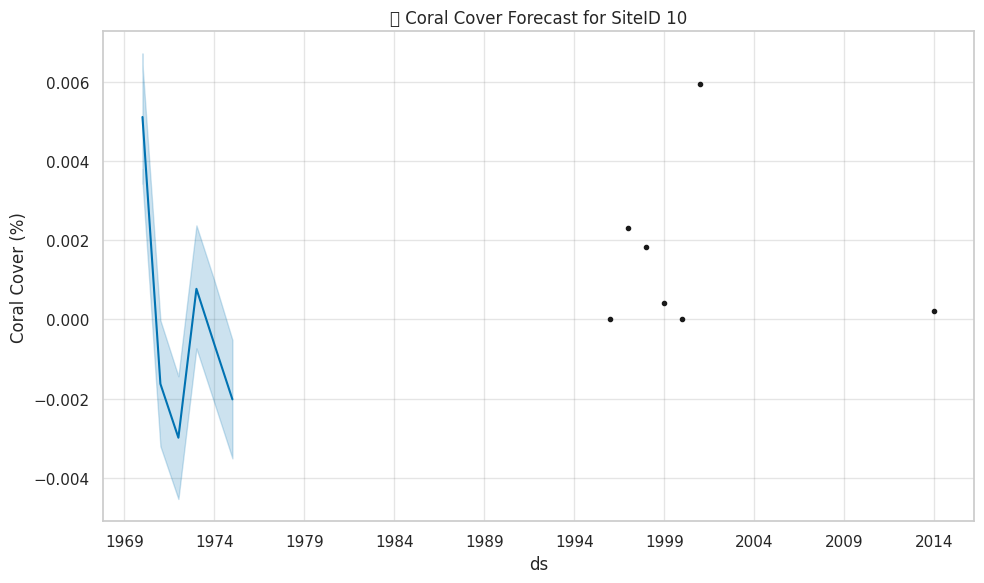

In [ ]:
!pip install prophet

from prophet import Prophet

# Pick a single site (or loop through all if needed)
site_id = 10
site_ts = stony_cover_df[stony_cover_df["SiteID"] == site_id].groupby("Year")["Total_Coral_Cover"].mean().reset_index()
site_ts.columns = ["ds", "y"]

# Fit model
model = Prophet()
model.fit(site_ts)

# Forecast next 5 years
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)

# Plot
model.plot(forecast)
plt.title(f"📈 Coral Cover Forecast for SiteID {site_id}")
plt.ylabel("Coral Cover (%)")
plt.tight_layout()
plt.show()


### 📈 B. ML-Based Forecasting (All Sites)

<ipython-input-37-20f72b941c0b>:25: UserWarning:

Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.



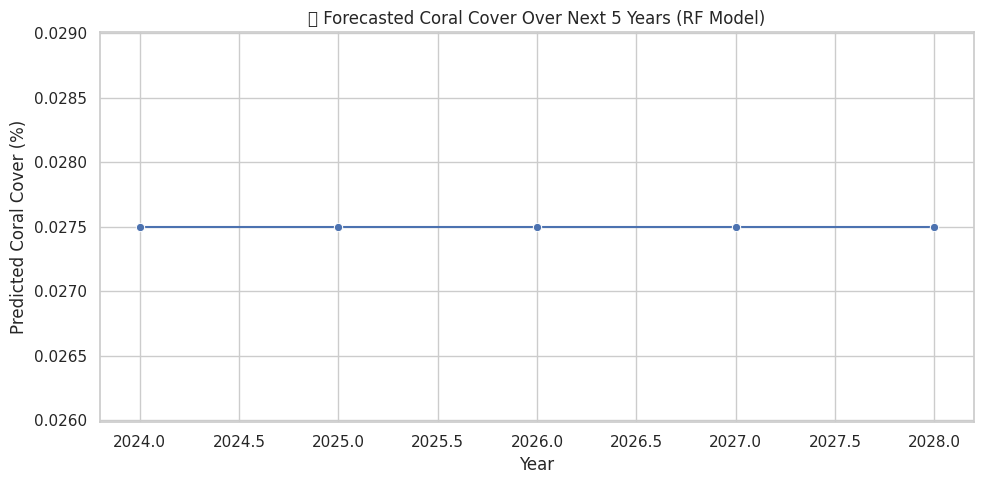

In [ ]:
# Train model to predict coral cover for next year
model_df["Next_Year"] = model_df["Year"] + 1
next_year_data = model_df[["Year", "Region_encoded", "Subregion_encoded", "SpeciesRichness", "Total_Coral_Cover"]].copy()
next_year_data.columns = ["Year", "Region_encoded", "Subregion_encoded", "SpeciesRichness", "Target"]

# Predict next 5 years: simulation loop
future_preds = []

for year in range(2024, 2029):
    temp_input = {
        "Year": year,
        "Region_encoded": model_df["Region_encoded"].mean(),
        "Subregion_encoded": model_df["Subregion_encoded"].mean(),
        "SpeciesRichness": model_df["SpeciesRichness"].mean()
    }
    pred = rf.predict(pd.DataFrame([temp_input]))[0]
    future_preds.append((year, pred))

# Plot
future_df = pd.DataFrame(future_preds, columns=["Year", "Predicted_Coral_Cover"])
plt.figure(figsize=(10,5))
sns.lineplot(data=future_df, x="Year", y="Predicted_Coral_Cover", marker="o")
plt.title("🔮 Forecasted Coral Cover Over Next 5 Years (RF Model)")
plt.ylabel("Predicted Coral Cover (%)")
plt.tight_layout()
plt.show()


### Code for Scenario-Based Forecasting

<ipython-input-38-973caa1ca9a5>:65: UserWarning:

Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.



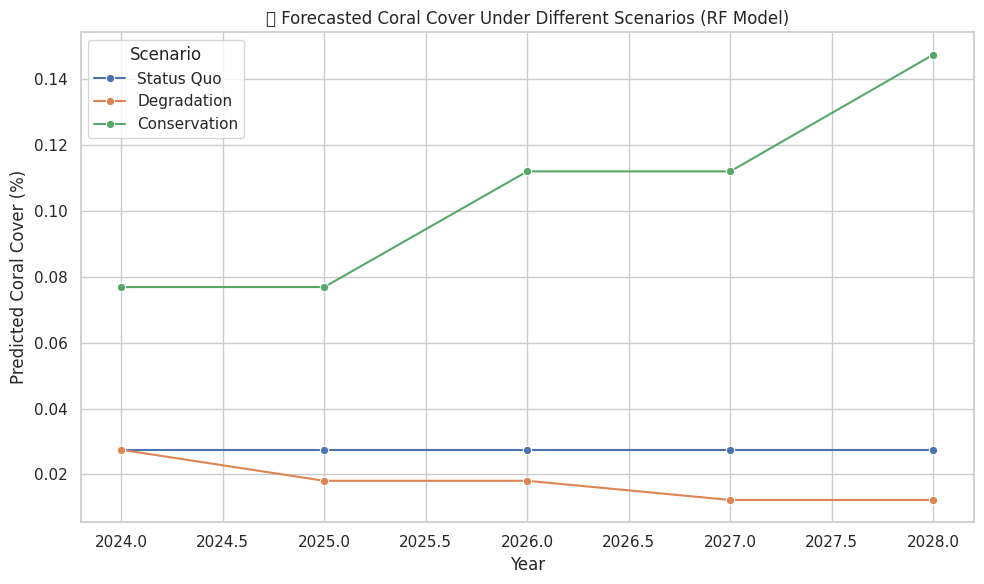

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume rf model is already trained and model_df is defined

# Get average values for encoding
avg_region = model_df["Region_encoded"].mean()
avg_subregion = model_df["Subregion_encoded"].mean()
base_richness = model_df["SpeciesRichness"].mean()

years = list(range(2024, 2029))

scenarios = {
    "Status Quo": [],
    "Degradation": [],
    "Conservation": []
}

# Simulate different richness trends per scenario
for year in years:
    # 1. Status Quo (no change in richness)
    input_sq = {
        "Year": year,
        "Region_encoded": avg_region,
        "Subregion_encoded": avg_subregion,
        "SpeciesRichness": base_richness
    }
    scenarios["Status Quo"].append(rf.predict(pd.DataFrame([input_sq]))[0])

    # 2. Degradation (richness drops each year)
    degraded_richness = base_richness - 0.5 * (year - 2023)
    input_deg = {
        "Year": year,
        "Region_encoded": avg_region,
        "Subregion_encoded": avg_subregion,
        "SpeciesRichness": degraded_richness
    }
    scenarios["Degradation"].append(rf.predict(pd.DataFrame([input_deg]))[0])

    # 3. Conservation (richness improves each year)
    improved_richness = base_richness + 0.5 * (year - 2023)
    input_cons = {
        "Year": year,
        "Region_encoded": avg_region,
        "Subregion_encoded": avg_subregion,
        "SpeciesRichness": improved_richness
    }
    scenarios["Conservation"].append(rf.predict(pd.DataFrame([input_cons]))[0])

# Prepare DataFrame for plotting
plot_df = pd.DataFrame({
    "Year": years,
    "Status Quo": scenarios["Status Quo"],
    "Degradation": scenarios["Degradation"],
    "Conservation": scenarios["Conservation"]
}).melt(id_vars="Year", var_name="Scenario", value_name="Predicted_Coral_Cover")

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=plot_df, x="Year", y="Predicted_Coral_Cover", hue="Scenario", marker="o")
plt.title("🔮 Forecasted Coral Cover Under Different Scenarios (RF Model)")
plt.ylabel("Predicted Coral Cover (%)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


In [ ]:
# The End
# Thanks for your time